<a href="https://colab.research.google.com/github/Sadam1122/Tugas-AI-Big-Data/blob/main/Tugas_AI_Sadam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Data Classification: Heart Disease Risk Prediction**

**1. Data Exploration**

First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Last few rows of the dataset:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50  

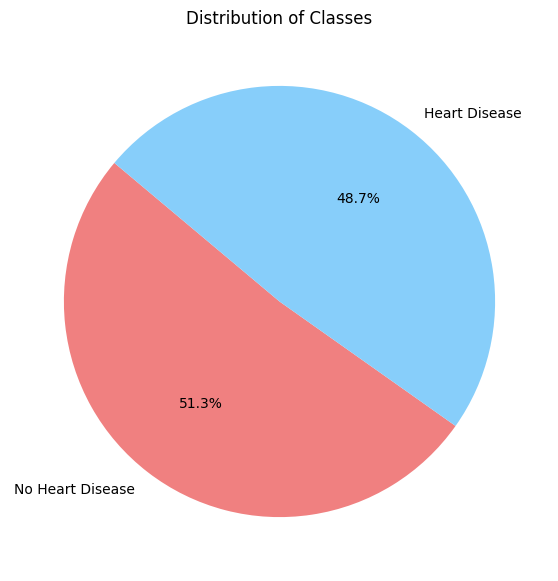

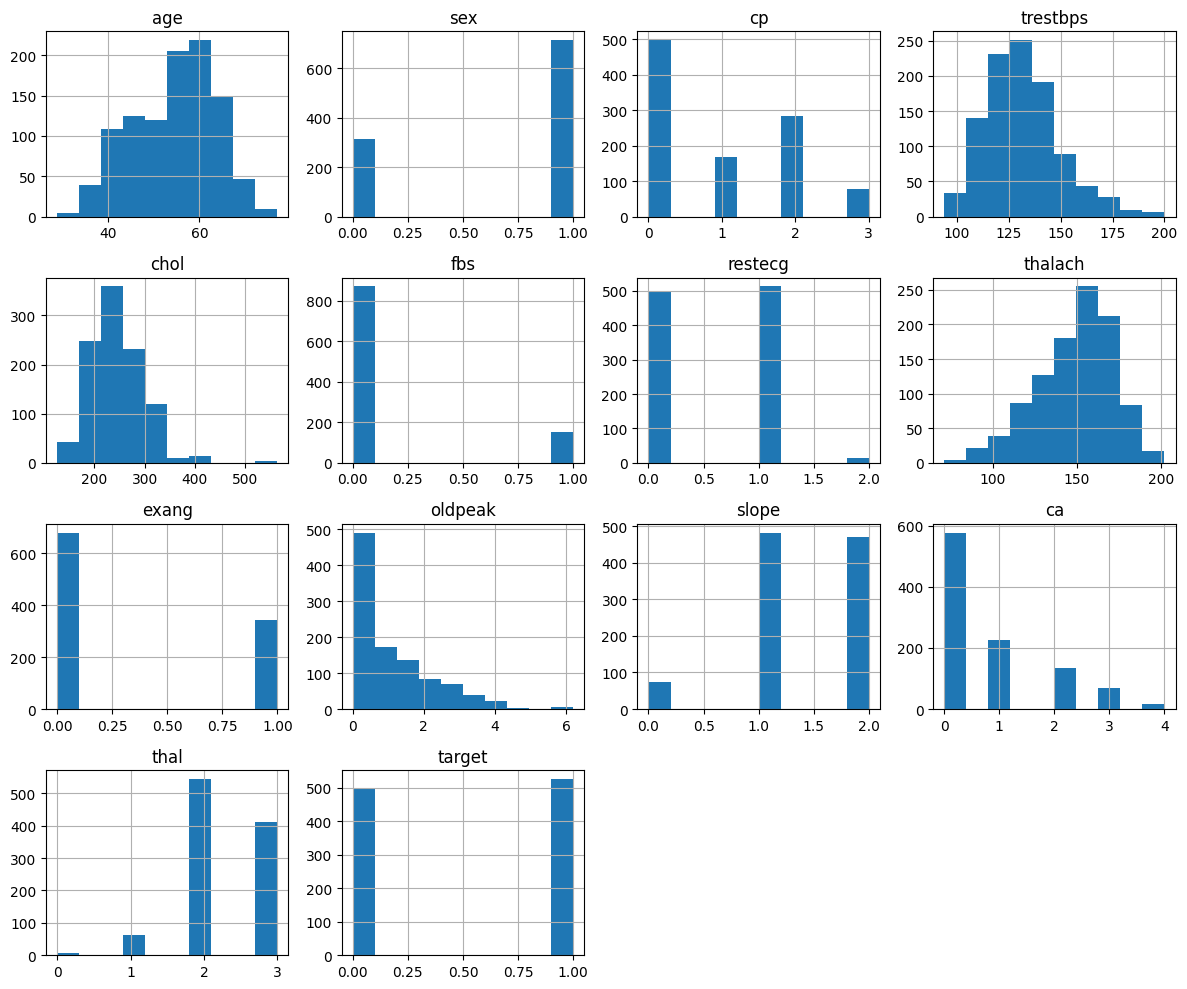

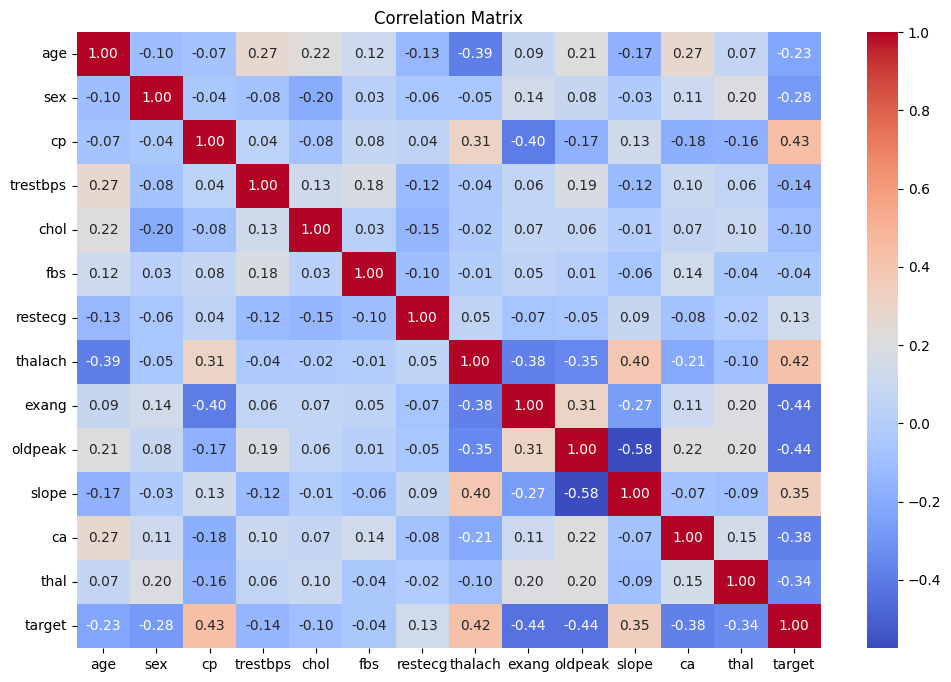

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
heart_df = pd.read_csv("./heart.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(heart_df.head())

# Display the last few rows of the dataset
print("\nLast few rows of the dataset:")
print(heart_df.tail())

# Dataset information
print("\nDataset information:")
print(heart_df.info())

# Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(heart_df.describe())

# Pie chart showing the distribution of classes
labels = ['No Heart Disease', 'Heart Disease']
sizes = heart_df['target'].value_counts().values
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.show()

# Histograms for numerical features
heart_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**2. Data Preprocessing**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X_heart = heart_df.drop('target', axis=1)
y_heart = heart_df['target']

# Splitting the dataset into the Training set and Test set
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# Feature scaling
scaler_heart = StandardScaler()
X_train_scaled_heart = scaler_heart.fit_transform(X_train_heart)
X_test_scaled_heart = scaler_heart.transform(X_test_heart)


**3. Data Training and Prediction**
*   Logistic Regression



Logistic Regression:
Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902


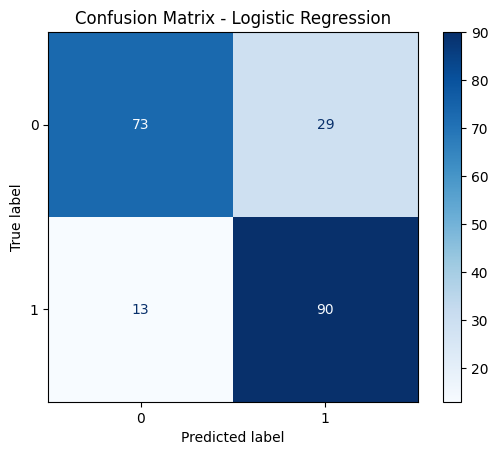

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Training the Logistic Regression model
log_reg_heart = LogisticRegression()
log_reg_heart.fit(X_train_scaled_heart, y_train_heart)

# Making predictions
y_pred_lr_heart = log_reg_heart.predict(X_test_scaled_heart)

# Evaluating the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test_heart, y_pred_lr_heart))
print("Precision:", precision_score(y_test_heart, y_pred_lr_heart))
print("Recall:", recall_score(y_test_heart, y_pred_lr_heart))

# Confusion matrix
cm_lr_heart = confusion_matrix(y_test_heart, y_pred_lr_heart)
disp_lr_heart = ConfusionMatrixDisplay(confusion_matrix=cm_lr_heart, display_labels=log_reg_heart.classes_)
disp_lr_heart.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()



*   Support Vector Machine (SVM)

Support Vector Machine:
Accuracy: 0.8146341463414634
Precision: 0.76
Recall: 0.9223300970873787


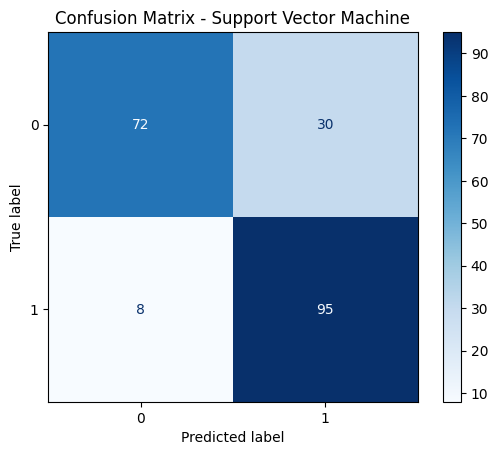

In [11]:
from sklearn.svm import SVC

# Training the SVM model
svm_heart = SVC(kernel='linear')
svm_heart.fit(X_train_scaled_heart, y_train_heart)

# Making predictions
y_pred_svm_heart = svm_heart.predict(X_test_scaled_heart)

# Evaluating the model
print("Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test_heart, y_pred_svm_heart))
print("Precision:", precision_score(y_test_heart, y_pred_svm_heart))
print("Recall:", recall_score(y_test_heart, y_pred_svm_heart))

# Confusion matrix
cm_svm_heart = confusion_matrix(y_test_heart, y_pred_svm_heart)
disp_svm_heart = ConfusionMatrixDisplay(confusion_matrix=cm_svm_heart, display_labels=svm_heart.classes_)
disp_svm_heart.plot(cmap='Blues')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()


*   Decision Tree

Decision Tree:
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767


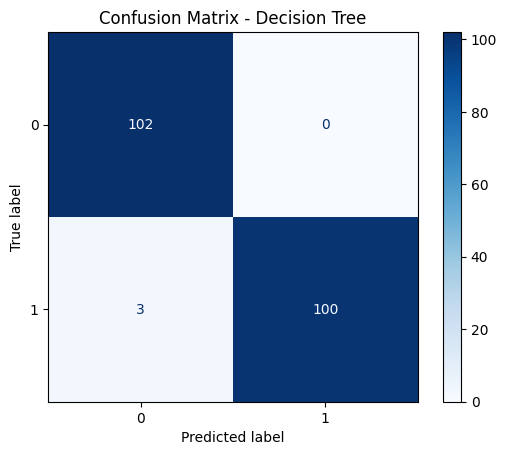

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Training the Decision Tree model
dt_heart = DecisionTreeClassifier()
dt_heart.fit(X_train_scaled_heart, y_train_heart)

# Making predictions
y_pred_dt_heart = dt_heart.predict(X_test_scaled_heart)

# Evaluating the model
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test_heart, y_pred_dt_heart))
print("Precision:", precision_score(y_test_heart, y_pred_dt_heart))
print("Recall:", recall_score(y_test_heart, y_pred_dt_heart))

# Confusion matrix
cm_dt_heart = confusion_matrix(y_test_heart, y_pred_dt_heart)
disp_dt_heart = ConfusionMatrixDisplay(confusion_matrix=cm_dt_heart, display_labels=dt_heart.classes_)
disp_dt_heart.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


**4. Melakukan Pelatihan Ulang Model**

*   Random Forest

Random Forest:
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767


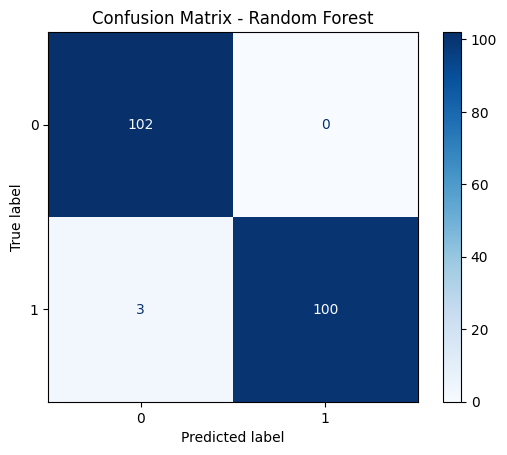

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest model
rf_heart = RandomForestClassifier()
rf_heart.fit(X_train_scaled_heart, y_train_heart)

# Making predictions
y_pred_rf_heart = rf_heart.predict(X_test_scaled_heart)

# Evaluating the model
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test_heart, y_pred_rf_heart))
print("Precision:", precision_score(y_test_heart, y_pred_rf_heart))
print("Recall:", recall_score(y_test_heart, y_pred_rf_heart))

# Confusion matrix
cm_rf_heart = confusion_matrix(y_test_heart, y_pred_rf_heart)
disp_rf_heart = ConfusionMatrixDisplay(confusion_matrix=cm_rf_heart, display_labels=rf_heart.classes_)
disp_rf_heart.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()


**5. Kesimpulan**

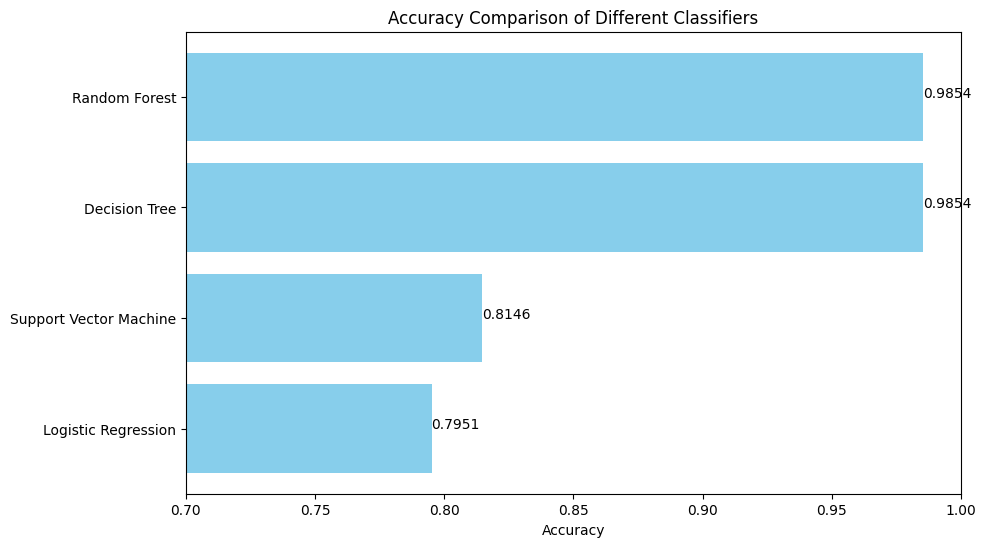

In [14]:
# Compare accuracy of all classifiers
classifiers = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test_heart, y_pred_lr_heart), accuracy_score(y_test_heart, y_pred_svm_heart), accuracy_score(y_test_heart, y_pred_dt_heart), accuracy_score(y_test_heart, y_pred_rf_heart)]

plt.figure(figsize=(10, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.xlim(0.7, 1.0)
for index, value in enumerate(accuracies):
    plt.text(value, index, str(round(value, 4)))
plt.show()
